In [1]:
import tensorwatch as tw
import torchvision.models

In [2]:
alexnet_model = torchvision.models.alexnet()
vgg16_model = torchvision.models.vgg16()

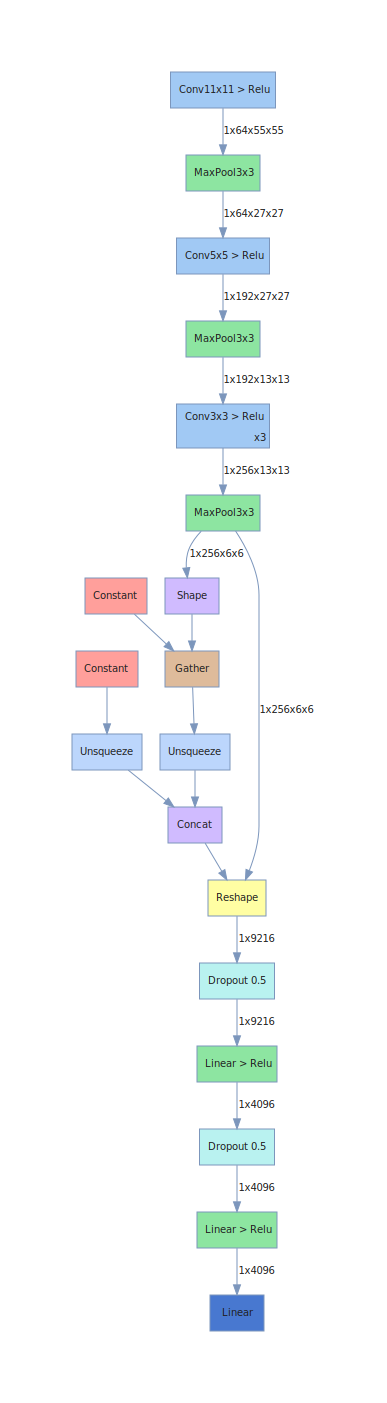

In [3]:
tw.draw_model(alexnet_model, [1, 3, 224, 224])

In [4]:
import torch.nn as nn

class Linear(nn.Module):
    def forward(self, x):
        return x

class SimpleVGG(nn.Module):
    def __init__(self, disable_activations: bool = False):
        """disable_activations: whether to generate network with Relus or not."""
        super(SimpleVGG, self).__init__()
        self.features = self._make_layers(disable_activations)

    def forward(self, x):
        # index of layers with feature maps
        select = [1, 3, 8, 13]
        self.feature_maps = []
        for l, layer in enumerate(self.features):
            x = layer(x)
            if l in select:
                self.feature_maps.append(x)
        return x

    def _make_layers(self, disable_activations: bool):
        activation = lambda: Linear() if disable_activations else nn.ReLU()
        layers = [
            nn.Conv2d(3, 64, kernel_size=3),
            activation(),
            nn.Conv2d(64, 64, kernel_size=3),
            activation(), # 3
            
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3),
            activation(),
            nn.Conv2d(128, 128, kernel_size=3),
            activation(), # 8
            
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3),
            activation(),
            nn.Conv2d(256, 256, kernel_size=3),
            activation(), # 13
        ]        
        return nn.Sequential(*layers)  

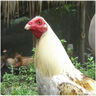

In [5]:
img = tw.open_image("D:\\datasets\\ImageNet\\train\\n01514668\\n01514668_1367.JPEG", resize=(96, 96))
img

[2019-03-07 14:29:27,522][ INFO][pytorch.py]::Feature maps shape: [GridShape(n=1, w=94, h=94, c=64), GridShape(n=1, w=92, h=92, c=64), GridShape(n=1, w=42, h=42, c=128), GridShape(n=1, w=17, h=17, c=256)]
[2019-03-07 14:29:27,524][ INFO][pytorch.py]::Input shape       : GridShape(n=1, w=96, h=96, c=3)
[2019-03-07 14:29:29,101][ INFO][base.py]::Estimated receptive field for feature map [0]: ReceptiveFieldDescription(offset=(1.5, 1.5), stride=(1.0, 1.0), size=Size(w=3, h=3))
[2019-03-07 14:29:29,102][ INFO][base.py]::Estimated receptive field for feature map [1]: ReceptiveFieldDescription(offset=(2.5, 2.5), stride=(1.0, 1.0), size=Size(w=5, h=5))
[2019-03-07 14:29:29,102][ INFO][base.py]::Estimated receptive field for feature map [2]: ReceptiveFieldDescription(offset=(7.0, 7.0), stride=(2.0, 2.0), size=Size(w=14, h=14))
[2019-03-07 14:29:29,103][ INFO][base.py]::Estimated receptive field for feature map [3]: ReceptiveFieldDescription(offset=(16.0, 16.0), stride=(4.0, 4.0), size=Size(w=32

<IPython.core.display.Javascript object>


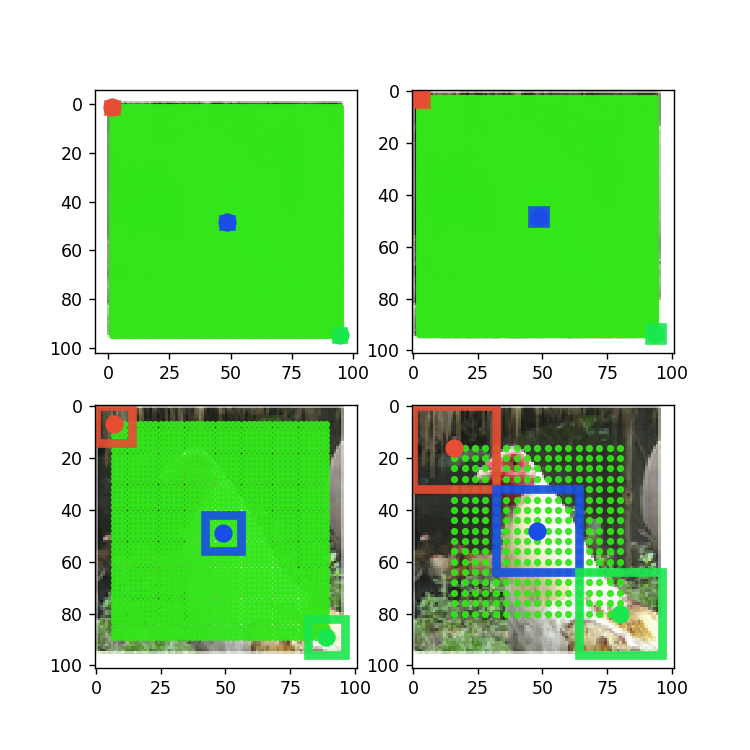

In [6]:
model = SimpleVGG()
tw.plot_receptive_field(model, img)

[2019-03-07 14:30:51,100][ INFO][pytorch.py]::Feature maps shape: [GridShape(n=1, w=94, h=94, c=64), GridShape(n=1, w=92, h=92, c=64), GridShape(n=1, w=42, h=42, c=128), GridShape(n=1, w=17, h=17, c=256)]
[2019-03-07 14:30:51,106][ INFO][pytorch.py]::Input shape       : GridShape(n=1, w=96, h=96, c=3)
[2019-03-07 14:30:53,002][ INFO][base.py]::Estimated receptive field for feature map [0]: ReceptiveFieldDescription(offset=(1.5, 1.5), stride=(1.0, 1.0), size=Size(w=3, h=3))
[2019-03-07 14:30:53,003][ INFO][base.py]::Estimated receptive field for feature map [1]: ReceptiveFieldDescription(offset=(2.5, 2.5), stride=(1.0, 1.0), size=Size(w=5, h=5))
[2019-03-07 14:30:53,004][ INFO][base.py]::Estimated receptive field for feature map [2]: ReceptiveFieldDescription(offset=(7.0, 7.0), stride=(2.0, 2.0), size=Size(w=14, h=14))
[2019-03-07 14:30:53,004][ INFO][base.py]::Estimated receptive field for feature map [3]: ReceptiveFieldDescription(offset=(16.0, 16.0), stride=(4.0, 4.0), size=Size(w=32

<IPython.core.display.Javascript object>


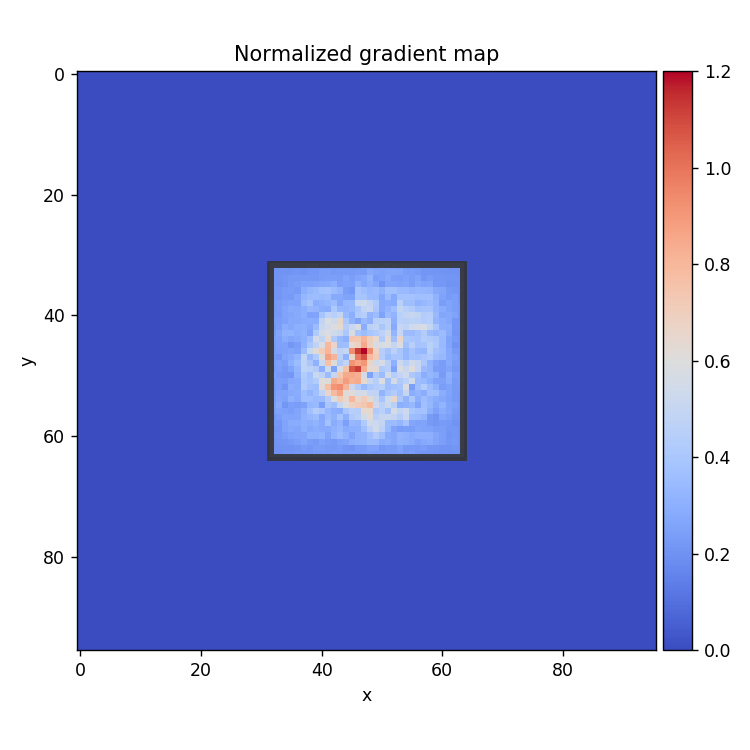

In [7]:
tw.plot_grads_at(model, img, feature_map_index=3, point=(8,8))

In [8]:
tw.model_stats(alexnet_model, [1, 3, 224, 224])

[MAdd]: Dropout is not supported!
[Flops]: Dropout is not supported!
[Memory]: Dropout is not supported!
[MAdd]: Dropout is not supported!
[Flops]: Dropout is not supported!
[Memory]: Dropout is not supported!


,module name,input shape,output shape,params,memory(MB),MAdd,Flops,MemRead(B),MemWrite(B),duration[%],MemR+W(B)
0,features.0,3 224 224,64 55 55,23296.0,0.74,"140,553,600.0","70,470,400.0",695296.0,774400.0,8.79%,1469696.0
1,features.1,64 55 55,64 55 55,0.0,0.74,"193,600.0","193,600.0",774400.0,774400.0,1.74%,1548800.0
2,features.2,64 55 55,64 27 27,0.0,0.18,"373,248.0","193,600.0",774400.0,186624.0,7.01%,961024.0
3,features.3,64 27 27,192 27 27,307392.0,0.53,"447,897,600.0","224,088,768.0",1416192.0,559872.0,15.81%,1976064.0
4,features.4,192 27 27,192 27 27,0.0,0.53,"139,968.0","139,968.0",559872.0,559872.0,1.74%,1119744.0
5,features.5,192 27 27,192 13 13,0.0,0.12,"259,584.0","139,968.0",559872.0,129792.0,3.51%,689664.0
6,features.6,192 13 13,384 13 13,663936.0,0.25,"224,280,576.0","112,205,184.0",2785536.0,259584.0,7.02%,3045120.0
7,features.7,384 13 13,384 13 13,0.0,0.25,"64,896.0","64,896.0",259584.0,259584.0,0.00%,519168.0
8,features.8,384 13 13,256 13 13,884992.0,0.17,"299,040,768.0","149,563,648.0",3799552.0,173056.0,10.52%,3972608.0
9,features.9,256 13 13,256 13 13,0.0,0.17,"43,264.0","43,264.0",173056.0,173056.0,0.00%,346112.0
